In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams 
import seaborn as sns

In [3]:
#Function to display all columns
pd.set_option('display.max_columns', None)

#Reading the data
df = pd.read_csv("/Users/prathikpradeep/HC_One/data/raw/CandidateApplicationsData.csv")

In [4]:
#Replacing Not Found values with NA
df = df.replace('Not Found', pd.NA)


-------------------------------------------------------------------------------------------------------------------


\section*{STRUCTURED ABSTRACT}

\section*{\small Context}

<div style="text-align: justify"> HC-One currently scours through thousands of applications every week for care home workers and nurses. However, this activity requires the recruitment team to manually evaluate the likelihood of each candidate being a successful hire or not. This process is very tedious and time consuming and may result in the loss of quality candidates.  </div>

\section*{\small Objectives}

<div style="text-align: justify"> The main objective of this investigation is to evaluate whether each candidate would be a successful hire or not using the CRISP-DM framework. This would simplify the recruitment process and reduce the time and resources required to review each applicant. </div>

\section*{\small Method}

<div style="text-align: justify"> To achieve this goal, exploratory data analysis and different modelling techniques were carried out on a large dataset with information about the successful candidates and their characteristics to get answers to a set of critical questions regarding the likeliness of a candidate being selected for the role. </div>

\section*{\small Results}

<div style="text-align: justify"> The findings of the analysis suggest that the length of service in months is an important factor in determining the likelihood of a candidate being a successful hire. Furthermore, based on multiple modelling techniques carried out on the dataset it can be concluded that the higher the predicted length of service in months, the higher the likelihood of the candidate being successful. </div>

\section*{\small Novelty}

<div style="text-align: justify"> This project is done entirely using the CRISP-DM cycle methodology and focuses on creating an EDA and modelling on the dataset in which, the results of this project serve as a foundation for future projects using the CandidateSchools and EmploymentHistory datasets which could help provide more insights on the likelihood of the applicant being a successful candidate. </div>


-------------------------------------------------------------------------------------------------------------------


\section*{CRISP-DM Cycle: Scoring System to Evaluate Likelihood of a Candidate Being a Successful Hire}

# BUSINESS UNDERSTANDING

## Background

<div style="text-align: justify"> In today’s day and age, data can be used to simplify almost all processes with the help of tools and technologies like exploratory data analysis, predictive modelling, etc. For this project, recruitment data has been produced by the organisation HC-One. HC-One is the largest care home operator in the UK. 

HC-One currently combs through 2,500 to 3,000 applications per week for care workers and nurses. However, this activity consists of a majority of noise and the recruitment team is forced to manually evaluate the likelihood of each candidate being a successful hire or not. This process is very tedious and time consuming and results in the loss of quality candidates. 

Therefore, HC-One has approached the students of Newcastle University to tackle this issue by coming up with a scoring system to simplify this process.</div>


## Business Objectives

<div style="text-align: justify"> Evaluating whether each candidate would be a successful hire or not would be the main objective for this CRISP-DM cycle. 

By doing this, it would simplify the recruitment process and reduce the time taken to review each applicant. Therefore, this would allow the recruitment team to recruit the highest quality of candidates.

Here, success would be defined as a high accuracy of the scoring system to predict the likelihood of a candidate being a successful hire. </div>


## Data Mining Goals (Technical Questions)

<div style="text-align: justify"> Based on the business objectives, looking for any relationship in the number of enrolments over time. This means the results could be an increase in the enrolments over time, a drop in the enrolments over time or no relationship between the enrolments and time. The next step could be to look into the relations between the demographics, number of enrolments and the periods the course has been running. The demographic to be looked into could be the country as it could provide useful insights based on the well performing industries in the specific countries.

Considering the business objective defined in chapter 1.1, the business objective could be broken down into multiple data mining goals, which are as follows:

* Selecting the necessary variables that would be required for further evaluation.
* Implementing various prediction modelling methods to predict the score to specify the likelihood of a candidate being a successful hire.
* Evaluating the various predictive modelling methods to find the best method for the data provided.

These steps provide a technical outline of the requirements for this cycle. </div>


## Project Plan

<div style="text-align: justify"> To follow the CRISP-DM cycle to achieve the business objective, the data would first need to be understood. This would mean understanding and analysing all the data to find the relevant variables useful for this particular cycle. The data would need to be prepared as required for the modelling, which generally includes cleaning, creating additional variables from the existing variables and formatting the data based on the requirements. The next step would be to carry out the required modelling process to create and solve the data mining goals. The results of the modelling stage would then be compared to the business objective to check whether it has been answered. The final step would be to generate a report and pass it on to the relevant people. </div>



## Choices of Research Tools, Models and Software Considerations

<div style="text-align: justify"> The tools used for this project are jupyter notebooks, powerbi for visualisation, python libraries like pandas, numpy, matplotlib, sklearn and cookiecutter with the data science template. </div>

# DATA UNDERSTANDING

<div style="text-align: justify"> For this project, the CandidateApplicationsData dataset is the only dataset being used. </div>

## Describing Data 

<div style="text-align: justify"> At first glance, the CandidateApplicationsData dataset is observed to have 24,483 records and 129 different variables as observed in Table 1. This shows that the dataset is highly dimensional and feature selection will need to be carried out to retain the highly correlated and relevant features. </div> <br>

In [5]:
#Displaying the shape of the data
a = pd.DataFrame({"Number of Records": [df.shape[0]], 
                  "Number of Columns": [df.shape[1]]})

print(a.to_markdown(index=False))

|   Number of Records |   Number of Columns |
|--------------------:|--------------------:|
|               24483 |                 129 |


$$\textbf{Table 1}: \textbf{Number of Records and Columns in the CandidateApplicationsData Dataset}$$

<div style="text-align: justify"> There CandidateApplicationsData dataset has NA values which will need to be cleaned. The Contracted hours column has 4 NA values, Applied Through (Channel Type) has 9,426 NA values, Applied Through (Channel) has 12,984 NA values, Home Code has 68 NA values, Advertised Salary has 693 NA values and Distance Candidate is from Job location (KM) has 5 NA values. Group Code, Type Code and Category Code columns have 127 NA values, and Competitor Data columns have 105 NA values. In addition to this, many columns have ‘Not Found’ values that can be considered as NA values. The Academic Qualifications - Count columns have 20,997 ‘Not Found’ values. The CandidateApplicationsData also has 4 duplicates as observed in Table 2. </div>

In [6]:
#Number of duplicates in the record
duplicates = pd.DataFrame({"Number of Duplicates": [df.duplicated().sum()]})  
print(duplicates.to_markdown(index = False))

|   Number of Duplicates |
|-----------------------:|
|                      4 |


$$\textbf{Table 2}: \textbf{Number of Duplicates in the Dataset}$$

<div style="text-align: justify"> From Table 3, it is observed that there are 3 job titles in the dataset, which are carer, nursing and senior carer. Carer consists of 19,836 records; nursing consists of 3,129 records and senior carer consists of 1,518 records. Carer makes up over 80% of the data and therefore can be concluded that the dataset is very imbalanced for each job title.  This could have an impact when it comes to training the model. </div>

In [7]:
#Number of records per job title
job_title_count = pd.DataFrame(df['Job Title'].value_counts())

print(job_title_count.to_markdown())

|              |   Job Title |
|:-------------|------------:|
| Carer        |       19836 |
| Nursing      |        3129 |
| Senior Carer |        1518 |


$$\textbf{Table 3}: \textbf{Number of Records for each Job Title}$$

## Exploratory Data Analysis

<div style="text-align: justify"> Table 4 shows that the value of kurtosis is 39.18. When compared to a normal distribution, a big kurtosis value indicates that the distribution has a steep peak and heavy tails. The skewness value is 4.16, This indicates that the data is skewed to the right as the skewness score is positive and therefore signifies that the tail of the distribution is longer to the right. This indicates that the presence of outliers is dragging the mean to the right of the distribution. </div>

In [8]:
#calculating Kurtosis and Skewness of the distribution
dist = pd.DataFrame({'Kurtosis': [round(df['length of service in months'].kurt(),2)],
                    'Skewness': [round(df['length of service in months'].skew(),2)]})
print(dist.to_markdown(index=False))

|   Kurtosis |   Skewness |
|-----------:|-----------:|
|      39.18 |       4.16 |


$$\textbf{Table 4}: \textbf{Kurtosis and Skewness of the distribution}$$

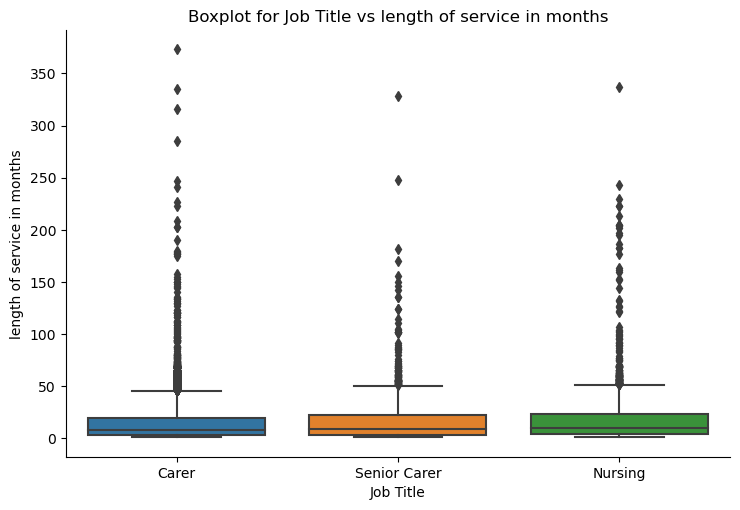

In [9]:
df = pd.read_csv("/Users/prathikpradeep/HC_One/data/raw/CandidateApplicationsData.csv")
sns.catplot(x="Job Title", y="length of service in months", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Job Title vs length of service in months")
plt.show()

$$\textbf{Figure 1}: \textbf{Boxplot for Job Title vs Length of Service in Months}$$

<div style="text-align: justify"> From Figure 1, it is observed that the minimum, interquartile range, median, and maximum for the job titles in the CandidateApplicationsData are very similar when compared to the length of service in months. It can also be observed that the job titles have a very high number of outliers, with carers having the most, followed by nursing and lastly senior carer. This could be because some of the candidates have a very high length of service in months which upon clarification indicates that these candidates are current employees at HC-One and have applied for a change of roles.</div>

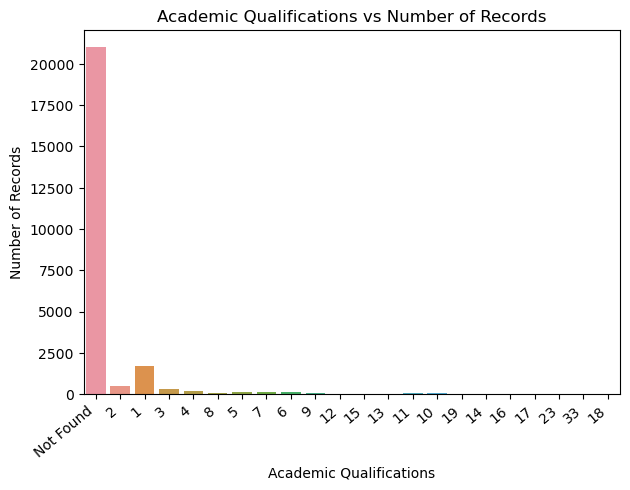

In [10]:
# Distribution of number of academic qualifications
ax = sns.countplot(x='All.1', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.xlabel('Academic Qualifications')
plt.ylabel('Number of Records')
plt.title("Academic Qualifications vs Number of Records")
plt.show()

$$\textbf{Figure 2}: \textbf{Total Number of Skills vs Number of Records}$$

<div style="text-align: justify">From Figure 2, it is evident that there are over 20,000 records in the Total Number of Skills with NA values. This is a problem since the majority of the data from columns is not available. This would mean that this column may need to be dropped since removing the records with NA values will result in having a very low number of columns which would not be desirable. </div>

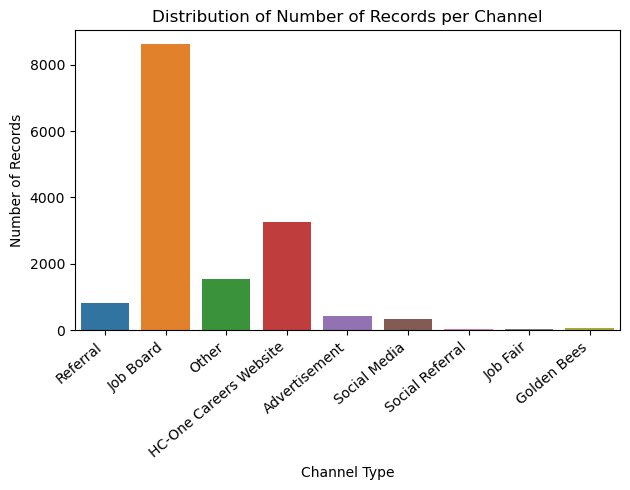

In [11]:
# Distribution of Number of Records per Channel
ax = sns.countplot(x='Applied Through (Channel Type)', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.xlabel('Channel Type')
plt.ylabel('Number of Records')
plt.title("Distribution of Number of Records per Channel")
plt.show()

$$\textbf{Figure 3}: \textbf{Distribution of Number of Records per Channel}$$

<div style="text-align: justify"> From Figure 3, it is observed that over 8,000 candidates applied for vacancies through the Job Board channel followed by HC-One Website, where just under 4,000 candidates applied for vacancies. These 2 channels make up for the majority of the applications. This indicates that majority of the applicants apply for vacancies posted on these two channels. </div>

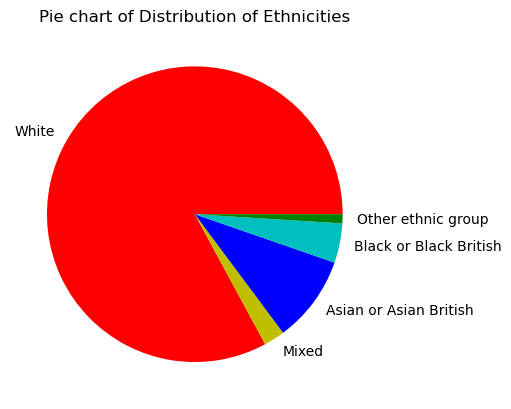

In [12]:
# # distribution of ethnicity
# print(df['Total population by ethnicity'].sum())
# print(df['White'].sum())
# # print(df['White: Gypsy or Irish traveller'].sum())
# print(df['Mixed'].sum())
# print(df['Asian or Asian British'].sum())
# # print(df['Asian: Indian'].sum())
# # print(df['Asian: Pakistani'].sum())
# # print(df['Asian: Bangladeshi'].sum())
# # print(df['Asian: Chinese'].sum())
# # print(df['Asian: other'].sum())
# print(df['Black or Black British'].sum())
# # print(df['Black: African'].sum())
# # print(df['Black: Caribbean'].sum())
# # print(df['Black: other'].sum())
# print(df['Other ethnic group'].sum())

y = np.array([5824146, 160679, 667715, 303178, 69873])

mylabels = ["White","Mixed", "Asian or Asian British", "Black or Black British", "Other ethnic group"]
mycolors = ['r', 'y', 'b', 'c', 'g']


plt.pie(y, labels = mylabels, colors = mycolors)
plt.title("Pie chart of Distribution of Ethnicities")
plt.show()

$$\textbf{Figure 4}: \textbf{Pie chart of Distribution of Ethnicities}$$

<div style="text-align: justify"> From Figure 4, it is observed that the majority of the candidates are from catchments with a white neighbourhood, followed by Asian or Asian British, Black or Black British and so on. This could be a factor of the location since the majority of the population is white based on geography. Therefore, this introduces a significant bias in the data and when it comes to the modelling stage as it may influence the model to favour candidates from white neighbourhoods which is not accurate and falls to a lack of data for the other ethnicities. This also plays a part in data ethics. Therefore, it would be beneficial to drop these columns from the dataset in the pre-processing stage.</div>

## Data Quality Report

<div style="text-align: justify"> After exploring the provided dataset, it can be concluded that the quality of the dataset is rather poor. some of the columns have a very large number of candidates, there are duplicates of candidates for each vacancy id with a differing length of service in months and contracted hours. There are also a large number of outliers which introduces a significant amount of noise to the dataset. The advertised salary column contains a lot of different formats and requires significant time and effort to clean. All of these issues can have a significant impact when it comes to modelling and hence would need to be rectified before proceeding any further. </div> <br>

# DATA PREPARATION

<div style="text-align: justify"> As discussed in the previous chapter, there is a large amount of pre-processing that is required. The various steps involved in the preparation of the data are discussed in this chapter. </div>

## Cleaning Data

<div style="text-align: justify">  The first step would be to change the 'Not Found' values to NA values. The next step would be to remove the duplicates that exist. The next step would be to remove all the NA values or zero values from the Contracted hours, Distance Candidate is from Job location (KM), Home Code, Advertised Salary, Group Code and Count of Care homes within 15 min drive columns. To remove the duplicate records that consist of different length of service in months and Contracted hours, all the columns except length of service in months and contracted hours are grouped and these two columns are aggregated. The length of service in months and Contracted hours are aggregated by taking the average and maximum of these columns respectively. The average length of service in months is taken since the average value would provide the most accurate representation of these candidates based on the limited information provided. Whereas, the maximum of the Contracted hours column is taken on the assumption that the maximum number of Contacted hours would provide the most accurate representation of these candidates based on the limited information provided.</div>

## Constructing Data

<div style="text-align: justify"> Here, the first step would be to convert the two time series columns, Vacancy Creation Date and Application Date to a date time format which is required for the next step. A new variable is created containing the date 2023-03-08 (the date the dataset was provided by HC-One). This is used to create a new column called month_diff where the difference between 2023-03-08 and the application date. This new column month_diff is compared to the length of services in months to identify the candidates that are current employees and applying for a new role within HC-One. This result is computed in a new column called 'Candidate previous employee [1 = yes, 0 = no]'. If the month_diff is greater than the application date then the candidate is considered to be an existing employee and the value 1 is considered, if the month_diff is less than the application date then the candidate is considered as a new applicant with a value 0. 

Cleaning the Advertised Salary columns was also necessary as they had different formats of salaries. First the "," was removed and the re.search function was used to extract the number from the column. The first number was passed through an if loop, if the value was in the hourly wage format, the value was directly appended into a new column called 'salary'. If the value was in the daily, monthly or annual salary, the format was changed to the hourly format and appended to the salary column.

The columns vacancy id, vacancy application id, candidate id, Vacancy Creation Date, Application Date, Application Day of Week, Application Hour in Day, Applied Through (Channel), Home Code, Advertised Salary, All, All.1, Total Skills on CV, Total, Social Demographic Code, Group, Type, Category, month_diff, mean_Contracted_hours and max_length_of_service_in_months were dropped as these columns were generally redundant and were not required as they contained data that was unnecessary for the modelling or represented an aggregation (total) of other columns.

The columns Employee: full-time, Employee: part-time, Self-employed, Unemployed (economically active), 'Full-time student (economically active), Retired, Student (economically inactive), Looking after home or family, Long-term sick or disabled and Other inactive were dropped as these values had a low correlation and logically would not have any impact on whether a candidate would be successful or not. It also brought up an ethical issue of whether the model would favour candidates coming from a particular financial background.

The columns Applied Through (Channel Type), GCSE, NVQ, A-Level, HND, Bachelors, Masters and Other.1 were dropped because the majority of the values in these columns were null and different rectification methods like imputing values or removing records with NA values were undesirable.
    
The columns Total population by ethnicity, White, White: Gypsy or Irish traveller, Mixed, Asian or Asian British, Asian: Indian, Asian: Pakistani, Asian: Bangladeshi, Asian: Chinese, Asian: other, Black or Black British, Black: African, Black: Caribbean, Black: other, Other ethnic group and Total population aged 16 to 74 were dropped as these columns were part of the catchment ethnicity data which introduced a bias and ethical concerns as explained in the exploratory data analysis chapter. Similarly, the columns Total Population, Males and Females columns were dropped as these columns would not be significant indicators of a candidates success and also introduced ethical concerns.
</div>


## Format Data

<div style="text-align: justify"> Some of the datatypes in the columns of the dataset were still incorrect and had to be changed to numerical formats for subset selection and modelling. The length of service in months, Group Code and Competitor Data columns were converted to integer datatypes. The Contracted hours and Distance Candidate is from Job location columns and were converted to float datatypes. Finally, the Job Title and Type Code columns were encoded ordinally. </div>

## Subset Selection

<div style="text-align: justify"> For feature selection, the SelectKBest method was used to find the columns with the highest correlation. The dataset was split into two parts and stored in X and y, X contained the all columns except for the target variable (length of service in months) and y contained only the target variable column (length of service in months). Using this method, the correlation for the columns in X were determined when compared to the target variable. The top 38 features were selected as these features produced the features which consisted of variables with correlation values greater than 0.15. Principle Component Analysis (PCA) was also used for X to try and reduce the number of dimensions in the data, this produced 11 PCAs. However, this method was later scrapped as it had a significant effect on the accuracy of the models. </div>

# MODELLING

<div style="text-align: justify"> The modelling technique used here is a supervised learning approach. Both regression models and classification models have been implemented. 

For the regression modelling, a Random Forrest regression model and a neural network model were used to predict the length of service in months. These models were not satisfactory as the best r2 scores obtained were 0.44 for the random forest regression model and 0.41 for the neural network. 

For the classification modelling, a Gradient Boosting Classifier was used to predict the job title. Hyperparameter tuning was also implemented using GridSearchCV, the best hyperparameters produced can be found in Table 5. The Gradient Boosting Classifier model with these hyperparameters produced a test accuracy of 95%. </div>

In [13]:
data = {'Hyper Parameters': ['criterion', 
                             'max_depth', 
                             'min_impurity_decrease', 
                             'min_samples_leaf',
                             'n_estimators'],        
        'Values': ['friedman_mse', 3, 0.0, 1, 200]}

hyp1 = pd.DataFrame(data)

print(hyp1.to_markdown(index = False))

| Hyper Parameters      | Values       |
|:----------------------|:-------------|
| criterion             | friedman_mse |
| max_depth             | 3            |
| min_impurity_decrease | 0.0          |
| min_samples_leaf      | 1            |
| n_estimators          | 200          |


$$\textbf{Table 5}: \textbf{GradientBoostingClassifier Hyper Parameters with Target Variable}$$ 
$$\textbf{as the Job Title}$$

<div style="text-align: justify"> The next classification approach was to predict the length of service in months. The dataset was split into three different datasets for each Job Title column. First, the length of service in months column was converted from a discrete variable to a categorical variable, the key for this can be found in Table 6. Next, a Random Forest Classifier was trained on each dataset using length of service in months as the target variable. RandomOverSampler was used to oversample the classes with very low frequencies in the target variable to balance the distribution for each class. SelectKBest was used to select the 10 best features based on their scores. Hyperparameter tuning was also implemented using RandomSearchCV, the best hyperparameters produced can be found in Table 7. The Random Forest Classifier model for Carer, Senior Carer and Nursing produced test accuracies of 89.99%, 87.80% and 89.25% respectively. </div>

In [14]:
import pandas as pd

data = {'Interval': ['0.628 - 013.0', '013.0 - 025.0', '025.0 - 037.0', '037.0 - 049.0', '049.0 - 061.0', 
                     '061.0 - 073.0', '073.0 - 085.0', '085.0 - 097.0', '097.0 - 109.0', '109.0 - 121.0', 
                     '121.0 - 133.0', '133.0 - 145.0', '145.0 - 157.0', '157.0 - 169.0', '169.0 - 181.0', 
                     '181.0 - 193.0', '193.0 - 205.0', '205.0 - 217.0', '217.0 - 229.0', '241.0 - 253.0', 
                     '313.0 - 325.0', '325.0 - 337.0', '361.0 - 373.0'],
        'Count': [11404, 2902, 1547, 835, 582, 
                  206, 22, 16, 14, 8, 
                  6, 4, 7, 2, 3, 
                  3, 2, 2, 1, 1, 
                  3, 2, 1]}

mod2_class = pd.DataFrame(data)

print(mod2_class.to_markdown(index = False))

| Interval      |   Count |
|:--------------|--------:|
| 0.628 - 013.0 |   11404 |
| 013.0 - 025.0 |    2902 |
| 025.0 - 037.0 |    1547 |
| 037.0 - 049.0 |     835 |
| 049.0 - 061.0 |     582 |
| 061.0 - 073.0 |     206 |
| 073.0 - 085.0 |      22 |
| 085.0 - 097.0 |      16 |
| 097.0 - 109.0 |      14 |
| 109.0 - 121.0 |       8 |
| 121.0 - 133.0 |       6 |
| 133.0 - 145.0 |       4 |
| 145.0 - 157.0 |       7 |
| 157.0 - 169.0 |       2 |
| 169.0 - 181.0 |       3 |
| 181.0 - 193.0 |       3 |
| 193.0 - 205.0 |       2 |
| 205.0 - 217.0 |       2 |
| 217.0 - 229.0 |       1 |
| 241.0 - 253.0 |       1 |
| 313.0 - 325.0 |       3 |
| 325.0 - 337.0 |       2 |
| 361.0 - 373.0 |       1 |


$$\textbf{Table 6}: \textbf{Length of Service in Months Converted to Labels with Frequency}$$
$$\textbf{     }$$

In [15]:
data = {'Model': ['Carer Model', 'Senior Carer Model', 'Nursing Model'],
        'n_estimators': [20, 5, 5],        
        'hmax_features': ['sqrt', 'sqrt', 'sqrt'],
        'max_depth': [12, 8, 10]
       }

hyp2 = pd.DataFrame(data)

print(hyp2.to_markdown(index = False))

| Model              |   n_estimators | hmax_features   |   max_depth |
|:-------------------|---------------:|:----------------|------------:|
| Carer Model        |             20 | sqrt            |          12 |
| Senior Carer Model |              5 | sqrt            |           8 |
| Nursing Model      |              5 | sqrt            |          10 |


$$\textbf{Table 7}: \textbf{Random Forest Classifier Hyper Parameters with the Length of Service in Months}$$ 
$$\textbf{as Target Variable for Different Models Based on Job Title}$$

<div style="text-align: justify"> The final classification approach was to predict the length of service in months. First, the length of service in months column was converted from a discrete variable to a categorical variable, the key for this can be found in Table 8. Next, a Bagging Classifier was trained on the training data and length of service in months as the target variable. Hyperparameter tuning was also implemented using GridSearchCV, the best hyperparameters produced can be found in Table 9. The Bagging Classifier model produced a test accuracy of 92%. </div>

In [16]:
data = {'Intervals': ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-22', '22-24', '24-26', '26-28', '28-30', '30-32', '32-1000'], 
        'Class': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 
        'Number of Samples': [3687, 2531, 1729, 1274, 1007, 833, 661, 588, 525, 451, 440, 406, 308, 313, 273, 228, 2319]}

mod2_class = pd.DataFrame(data)

print(mod2_class.to_markdown(index = False))


| Intervals   |   Class |   Number of Samples |
|:------------|--------:|--------------------:|
| 0-2         |       0 |                3687 |
| 2-4         |       1 |                2531 |
| 4-6         |       2 |                1729 |
| 6-8         |       3 |                1274 |
| 8-10        |       4 |                1007 |
| 10-12       |       5 |                 833 |
| 12-14       |       6 |                 661 |
| 14-16       |       7 |                 588 |
| 16-18       |       8 |                 525 |
| 18-20       |       9 |                 451 |
| 20-22       |      10 |                 440 |
| 22-24       |      11 |                 406 |
| 24-26       |      12 |                 308 |
| 26-28       |      13 |                 313 |
| 28-30       |      14 |                 273 |
| 30-32       |      15 |                 228 |
| 32-1000     |      16 |                2319 |


$$\textbf{Table 8}: \textbf{Length of Service in Months Converted to Labels with Frequency}$$
$$\textbf{     }$$

In [17]:
data = {'Hyper Parameters': ['max_features', 
                             'n_estimators', 
                             'random_state'],        
        'Values': [10,100,0]}

# {'max_features': 10, 'n_estimators': 100, 'random_state': 0}

hyp3 = pd.DataFrame(data)

print(hyp3.to_markdown(index = False))

| Hyper Parameters   |   Values |
|:-------------------|---------:|
| max_features       |       10 |
| n_estimators       |      100 |
| random_state       |        0 |


$$\textbf{Table 9}: \textbf{Bagging Classifier Hyper Parameters with Length of Service}$$
$$\textbf{in Months as Target Variable}$$

# EVALUATION

<div style="text-align: justify"> The first classification model implementation predicts the Job Titles of the candidates. The classification report can be found in Table 10. The precision, recall and f1 score were excellent for the carer and nursing job titles. However, the recall and f1 score were poor for the senior carer job title but the precision remains good. This could be due to a large number of variations in the data in the senior carer job title. The model still maintains a test accuracy of 95%. This model implementation is still considered to be sub-optimal as the model predicts job titles but the length of service is not being predicted here which is assumed to be the main factor when it comes to measuring the success of a candidate. </div>

In [18]:
data = {'Job Title': ['Carer', 'Senior Carer', 'Nursing', ' ', 'Accuracy', 'Macro-Average', 'Weighted Average'],
        'Precision': [0.95, 0.84, 1, " ", " ", 0.93, 0.95],
        'Recall': [0.99, 0.49, 0.96, " ", " ",0.81, 0.95],
        'F1-Score': [0.97, 0.62, 0.98, " ",0.95, 0.86, 0.95],
        'Support': [2897, 242, 376, " ", 3515, 3515, 3515]
        }

cm1 = pd.DataFrame(data)

print(cm1.to_markdown(index = False))


| Job Title        | Precision   | Recall   | F1-Score   | Support   |
|:-----------------|:------------|:---------|:-----------|:----------|
| Carer            | 0.95        | 0.99     | 0.97       | 2897      |
| Senior Carer     | 0.84        | 0.49     | 0.62       | 242       |
| Nursing          | 1           | 0.96     | 0.98       | 376       |
|                  |             |          |            |           |
| Accuracy         |             |          | 0.95       | 3515      |
| Macro-Average    | 0.93        | 0.81     | 0.86       | 3515      |
| Weighted Average | 0.95        | 0.95     | 0.95       | 3515      |


$$\textbf{Table 10}: \textbf{Classification Report for Model with Job Title as Target Variable}$$

<div style="text-align: justify"> The second classification model implementation predicts the length of service in months of the candidates after separating the dataset into 3 by job title. The classification reports for each dataset can be found in Tables 11, 12 and 13. The precision, recall and f1 scores were excellent apart from the classes from 0 to 4, these classes are considered to be poor. These models also maintain test accuracies of 89.99%, 87.80% and 89.25% respectively. However, this model implementation is still considered to be sub-optimal as the approach is not scalable if the number of different job titles increases to a large number. </div>

In [19]:
data = {
    ' ': [0,1,2,3,4,5,6,7,8,9,10,11,12,14,17,18,19,20,22, " ","Accuracy" , "Macro Average", "Weighted Average"],
        'precision': [0.84, 0.60, 0.68, 0.69, 0.62, 0.85, 0.90, 0.98, 0.97, 1.00, 1.00, 0.99, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, " ", " ", 0.90, 0.90],
        'recall': [0.40, 0.55, 0.58, 0.74, 0.87, 0.95, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, " ", " ", 0.90, 0.90],
        'f1-score': [0.54, 0.58, 0.63, 0.71, 0.72, 0.89, 0.95, 0.99, 0.99, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, " ", 0.90, 0.89, 0.90],
        'support': [1898, 1863, 1874, 1835, 1869, 1851, 1888, 1962, 1953, 1857, 1832, 1866, 1923, 1859, 1824, 1886, 1928, 1944, 1888, " ", 35800, 35800, 35800]
       }

cm2 = pd.DataFrame(data)

print(cm2.to_markdown(index = False))


|                  | precision   | recall   | f1-score   | support   |
|:-----------------|:------------|:---------|:-----------|:----------|
| 0                | 0.84        | 0.4      | 0.54       | 1898      |
| 1                | 0.6         | 0.55     | 0.58       | 1863      |
| 2                | 0.68        | 0.58     | 0.63       | 1874      |
| 3                | 0.69        | 0.74     | 0.71       | 1835      |
| 4                | 0.62        | 0.87     | 0.72       | 1869      |
| 5                | 0.85        | 0.95     | 0.89       | 1851      |
| 6                | 0.9         | 1.0      | 0.95       | 1888      |
| 7                | 0.98        | 1.0      | 0.99       | 1962      |
| 8                | 0.97        | 1.0      | 0.99       | 1953      |
| 9                | 1.0         | 1.0      | 1.0        | 1857      |
| 10               | 1.0         | 1.0      | 1.0        | 1832      |
| 11               | 0.99        | 1.0      | 1.0        | 1866      |
| 12  

$$\textbf{Table 11}: \textbf{Classification Report for Model with Length of Service in Months}$$
$$\textbf{as Target Variable for Carer Job Title}$$
$$\textbf{    }$$

In [20]:
# Create a dictionary to store the data
data = {'': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 17, 18, 19, 20, 22, " ","Accuracy" , "Macro Average", "Weighted Average"],
        'Precision': [0.84, 0.6, 0.68, 0.69, 0.62, 0.85, 0.9, 0.98, 0.97, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0," ", " ", 0.89, 0.89],
        'Recall': [0.4, 0.55, 0.58, 0.74, 0.87, 0.95, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0," ", " ", 0.88, 0.88],
        'F1-score': [0.54, 0.58, 0.63, 0.71, 0.72, 0.89, 0.95, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0," ", 0.88, 0.87, 0.87],
        'Support': [1898, 1863, 1874, 1835, 1869, 1851, 1888, 1962, 1953, 1857, 1832, 1866, 1923, 1859, 1824, 1886, 1928, 1944, 1888," ", 2196, 2196, 2196]}

# Create a pandas DataFrame
cm3 = pd.DataFrame(data)

# Print the DataFrame
print(cm3.to_markdown(index = False))

|                  | Precision   | Recall   | F1-score   | Support   |
|:-----------------|:------------|:---------|:-----------|:----------|
| 0                | 0.84        | 0.4      | 0.54       | 1898      |
| 1                | 0.6         | 0.55     | 0.58       | 1863      |
| 2                | 0.68        | 0.58     | 0.63       | 1874      |
| 3                | 0.69        | 0.74     | 0.71       | 1835      |
| 4                | 0.62        | 0.87     | 0.72       | 1869      |
| 5                | 0.85        | 0.95     | 0.89       | 1851      |
| 6                | 0.9         | 1.0      | 0.95       | 1888      |
| 7                | 0.98        | 1.0      | 0.99       | 1962      |
| 8                | 0.97        | 1.0      | 0.99       | 1953      |
| 9                | 1.0         | 1.0      | 1.0        | 1857      |
| 10               | 1.0         | 1.0      | 1.0        | 1832      |
| 11               | 0.99        | 1.0      | 1.0        | 1866      |
| 12  

$$\textbf{Table 12}: \textbf{Classification Report for Model with Length of Service in Months}$$ 
$$\textbf{as Target Variable for Senior Carer Job Title}$$
$$\textbf{    }$$

In [21]:
data = {
    '': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 19, 21, " ","Accuracy" , "Macro Average", "Weighted Average"],
    'precision': [0.41, 0.65, 0.64, 0.81, 0.87, 0.93, 0.91, 1.00, 0.95, 1.00, 1.00, 1.00, 1.00, 0.98, 0.95, 1.00, 1.00, 1.00, " ", " ", 0.89,0.90],
    'recall': [0.61, 0.46, 0.54, 0.63, 0.80, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00," "," ",0.89,0.89],
    'f1-score': [0.49, 0.54, 0.59, 0.71, 0.83, 0.96, 0.95, 1.00, 0.98, 1.00, 1.00, 1.00, 1.00, 0.99, 0.97, 1.00, 1.00, 1.00, " ", 0.89,0.89,0.89],
    'support': [238, 237, 246, 274, 248, 254, 227, 251, 255, 259, 262, 252, 267, 223, 242, 260, 254, 255," ", 4504, 4504, 4504]
}

cm4 = pd.DataFrame(data)
print(cm4.to_markdown(index = False))

|                  | precision   | recall   | f1-score   | support   |
|:-----------------|:------------|:---------|:-----------|:----------|
| 0                | 0.41        | 0.61     | 0.49       | 238       |
| 1                | 0.65        | 0.46     | 0.54       | 237       |
| 2                | 0.64        | 0.54     | 0.59       | 246       |
| 3                | 0.81        | 0.63     | 0.71       | 274       |
| 4                | 0.87        | 0.8      | 0.83       | 248       |
| 5                | 0.93        | 1.0      | 0.96       | 254       |
| 6                | 0.91        | 1.0      | 0.95       | 227       |
| 7                | 1.0         | 1.0      | 1.0        | 251       |
| 8                | 0.95        | 1.0      | 0.98       | 255       |
| 9                | 1.0         | 1.0      | 1.0        | 259       |
| 10               | 1.0         | 1.0      | 1.0        | 262       |
| 12               | 1.0         | 1.0      | 1.0        | 252       |
| 13  

$$\textbf{Table 13}: \textbf{Classification Report for Model with Length of Service in Months}$$ 
$$\textbf{as Target Variable for Nursing Job Title}$$
$$\textbf{    }$$

<div style="text-align: justify"> The final classification model implementation predicts the lenght of service in months of the candidates. The classification report can be found in Table 14. The confusion matrix plot for this model can be found in Figure 5. The precison, recall and f1 score were generally excellent except for the classes 0, 1, 2 and 16, where class 2 and 16 were still good. The model still maintains an overall test accuracy of 92%. This shows that this implementation is a balanced approach and is also scalable. The success of the candidate based on the length of service in months would be based on the requirements from HC-One. A good threshold would be a class 5 and above. However, if the requirement is for a temporary or a short term hire a lower class would be prefereble. If a long term hire is is required, a higher class would be preferable. </div>

In [22]:
data = {
    'precision': [0.62, 0.73, 0.83, 0.89, 0.92, 0.94, 0.94, 0.95, 0.97, 0.99, 0.97, 0.96, 0.98, 0.97, 0.99, 0.98, 0.94, " ", " ", 0.92, 0.92],
    'recall': [0.48, 0.66, 0.84, 0.92, 0.97, 0.99, 1, 0.99, 1, 0.99, 1, 1, 1, 1, 1, 1, 0.83, " ", " ", 0.92, 0.92],
    'f1-score': [0.54, 0.7, 0.83, 0.91, 0.94, 0.96, 0.97, 0.97, 0.98, 0.99, 0.98, 0.98, 0.99, 0.99, 0.99, 0.99, 0.88, " ", 0.92, 0.92, 0.92],
    'support': [733, 751, 714, 764, 668, 745, 777, 730, 737, 778, 760, 712, 734, 738, 733, 719, 743, " ", 12536, 12536, 12536]
}

mod2 = pd.DataFrame(data, index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16," ", "Accuracy", "Macro Average", "Weighted Average"])
mod2.index.name = 'Class'


print(mod2.to_markdown())


| Class            | precision   | recall   | f1-score   | support   |
|:-----------------|:------------|:---------|:-----------|:----------|
| 0                | 0.62        | 0.48     | 0.54       | 733       |
| 1                | 0.73        | 0.66     | 0.7        | 751       |
| 2                | 0.83        | 0.84     | 0.83       | 714       |
| 3                | 0.89        | 0.92     | 0.91       | 764       |
| 4                | 0.92        | 0.97     | 0.94       | 668       |
| 5                | 0.94        | 0.99     | 0.96       | 745       |
| 6                | 0.94        | 1        | 0.97       | 777       |
| 7                | 0.95        | 0.99     | 0.97       | 730       |
| 8                | 0.97        | 1        | 0.98       | 737       |
| 9                | 0.99        | 0.99     | 0.99       | 778       |
| 10               | 0.97        | 1        | 0.98       | 760       |
| 11               | 0.96        | 1        | 0.98       | 712       |
| 12  

$$\textbf{Table 14}: \textbf{Classification Report for Model with Length of Service in Months}$$
$$\textbf{as Target Variable}$$

<div style="text-align: justify"> Comparing the evaluation to the data mining goals defined in chapter 1, it is evident that all the data mining goals have been appropriately met. Therefore, the business objective that was defined in chapter 1 was completed and was successful as a highly accurate model was created to indicate whether a candidate would be successful as per the requirements of the recruiters. The solution provided is also scalable and is therefore an appropriate solution for this business objective.
</div>

![Alt Text](/Users/prathikpradeep/HC_One/reports/figures/Confusion_Matrix "Optional Title")

$$\textbf{Figure 5}: \textbf{Confusion Matrix Plot}$$

# VISUALISATION

<div style="text-align: justify"> The dashboard provides a comprehensive overview of the candidate's application data. Using the top left box, the user can search for a candidate by entering their unique 'Candidate ID'. Once the ID is entered, the dashboard displays the candidate's 'Length of Service', which reflects how long they have been working in the company. In addition, the dashboard presents the 'Channel' through which the candidate applied, along with the date of their application and the 'Job Title' they applied for. Furthermore, the dashboard features a pie chart that displays the candidate's 'Skill Set' and the total number of skills listed on their CV. This dashboard can be viewed in Figure 6. </div>
<br>

![Alt Text](/Users/prathikpradeep/HC_One/reports/figures/Visualisation "Optional Title")

$$\textbf{Figure 6}: \textbf{Representation of Visualisation}$$

# DEPLOYMENT

<div style="text-align: justify"> Since no models are being deployed, there is no deployment necessary. Therefore, the process of converting the jupyter notebook report to a pdf document is considered to be the deployment. </div>

# FUTURE SCOPE

<div style="text-align: justify"> To further develop this work, using the probabilities to create a scoring system that could indicate the likelihood of a particular candidate is a successful hire along with the predicted length of service in months for that specific candidate. Using a logarithmic scale for this would be ideal since the range of values is very large.

Implementing a Natural Language Processing model (NLP) to pick up keywords from the applicant's CV and using these keywords to predict whether a candidate would be suitable for particular job titles. This can be added to the existing classification model which predicts the length of service for each candidate. 
    
Joining the CandidateSchools and EmploymentHistory datasets with the CandidateApplicationsData dataset could help provide more insights for the applicants. This new learning could be implemented to determine whether a candidate would be successful. </div>

# CONCLUSION

<div style="text-align: justify"> In conclusion, the datasets provided by HC-One were analysed and meaningful insights were gained based on the candidate applications data. These insights were used to understand what approaches could be taken to tackle the business objectives. After analysing the dataset, it was found that length of service in months was a significant factor in determining the likelihood of a candidate being successful. Using the data provided, the necessary pre-processing steps were executed and the feature selection was implemented to select the features having the highest correlation. With the pre-processed data, regression and classification models were trained and the results were noted. The model classifying the length of service in months for all the job titles performed the best. This model was also the most scalable. The desirable candidates were the candidates with a higher predicted length of service in months. This indicates that these candidates have higher likelihood of being successful hires. </div>

In [25]:
# !jupyter nbconvert --to pdf --no-input --no-prompt CSC8633_Group_6_Report.ipynb